# 結合三個 Python 資料分析套件的小專案

> 使用 numpy、pandas 與 matplotlib 抓出累計確診數趨勢與每日新增確診數。
>
> 標籤：程式設計，獲取載入，整併轉換，摘要探索

郭耀仁 <yaojenkuo@datainpoint.com> from [DATAINPOINT](https://datainpoint.substack.com/welcome)

In [1]:
# 載入專案需要使用的套件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## TL; DR

在這個專案中，我們打算使用 numpy、pandas 與 matplotlib 抓出確診數趨勢與每日新增量；首先使用 pandas 將約翰霍普金斯大學 COVID-19 Data Repository 中的時間序列資料 time_series_covid19_confirmed_global.csv 載入、接著使用 numpy  計算每日新增確診人數、最後使用 matplotlib 繪製累計確診數趨勢與每日新增確診數。透過這個專案，我們能夠暸解如何整合運用三個 Python 的基礎資料分析套件。

## 取得時間序列資料

時間序列資料 time_series_covid19_confirmed_global.csv 可以從約翰霍普金斯大學的 COVID-19 Data Repository 取得；使用 `pandas` 套件中的 `read_csv()` 函式載入為資料框。

In [2]:
request_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
time_series = pd.read_csv(request_url)
print(time_series.shape)

(266, 242)


In [3]:
time_series.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38398,38494,38520,38544,38572,38606,38641,38716,38772,38815
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,10255,10406,10553,10704,10860,11021,11185,11353,11520,11672
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,46364,46653,46938,47216,47488,47752,48007,48254,48496,48734
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1215,1261,1261,1301,1301,1344,1344,1344,1438,1438
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2965,2981,3033,3092,3217,3279,3335,3388,3439,3569


## 轉置時間序列資料框

從原始載入的資料框中我們可以觀察到日期資訊擺放在欄位名稱，這是一種被稱為寬格式（wide-format）的外型，使用 `pandas` 套件中的 `melt()` 函式可以轉換為長格式（long-format）的外型，讓日期資訊可以轉置到資料列中，改以日期與確診數作為欄位名稱。

In [4]:
id_cols = time_series.columns[:4]
time_series_long = pd.melt(time_series, id_vars=id_cols, var_name='Date', value_name='Confirmed')
print(time_series_long.shape)

(63308, 6)


In [5]:
time_series_long.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [6]:
time_series_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63308 entries, 0 to 63307
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  19278 non-null  object 
 1   Country/Region  63308 non-null  object 
 2   Lat             63308 non-null  float64
 3   Long            63308 non-null  float64
 4   Date            63308 non-null  object 
 5   Confirmed       63308 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 2.9+ MB


## 轉換日期時間型態

目前 `Date` 欄位是文字型態，在資料排序時不一定會依照日期的先後，因此我們使用 `pandas` 套件中的 `to_datetime()` 函式轉換為日期時間型態。

In [7]:
date = pd.to_datetime(time_series_long['Date'])
time_series_long = time_series_long.drop('Date', axis=1)
time_series_long.insert(4, 'Date', date)
time_series_long.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0


In [8]:
time_series_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63308 entries, 0 to 63307
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  19278 non-null  object        
 1   Country/Region  63308 non-null  object        
 2   Lat             63308 non-null  float64       
 3   Long            63308 non-null  float64       
 4   Date            63308 non-null  datetime64[ns]
 5   Confirmed       63308 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 2.9+ MB


## 計算每日新增確診數

從約翰霍普金斯大學的 COVID-19 Data Repository 取得的時間序列資料 time_series_covid19_confirmed_global.csv 中記錄的是「累計確診數」，如果要求得每日新增確診數，必須將 `t+1` 日的累計確診數減去 `t` 日的累計確診數。使用 `numpy` 套件中的 `diff()` 函式可以完成這個計算，以台灣為例：

In [9]:
tw = time_series_long[time_series_long['Country/Region'] == 'Taiwan*']
daily_increase = np.diff(tw['Confirmed'].values)
daily_increase

array([ 0,  2,  0,  1,  1,  3,  0,  1,  1,  0,  0,  0,  1,  0,  5,  0,  1,
        1,  0,  0,  0,  0,  0,  0,  2,  2,  0,  1,  1,  2,  0,  2,  2,  1,
        1,  0,  2,  5,  1,  1,  1,  0,  2,  1,  0,  0,  0,  2,  1,  1,  1,
        3,  6,  8, 10, 23,  8, 27, 18, 16, 26, 20, 20, 17, 15, 16, 15,  8,
       16,  7, 10,  9,  7,  8, 10,  3,  3,  1,  2,  3,  3,  5,  0,  2,  0,
        0,  3, 22,  2,  3,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  3,  4,
        2,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,
        2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  3,  0,  0,  4,
        5,  0,  0,  0,  7,  1, -1,  2,  0,  1,  0,  2, -2,  0,  3,  1,  0,
        0,  1,  2,  1,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  1,  0,  1

## 繪製累計確診數趨勢

累計確診數趨勢圖是線圖，在 `pyplot` 套件中可以用 `plot()` 函式繪製，X 軸資料要傳入日期 `Date`，Y 軸資料要傳入累計確診數 `Confirmed`，以台灣為例：

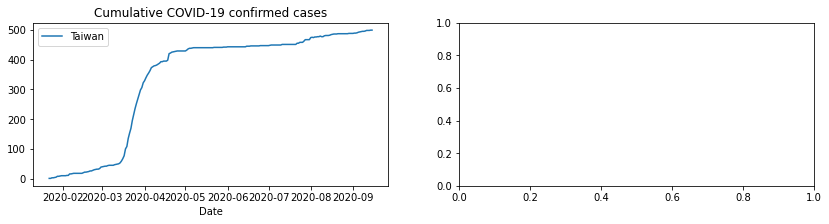

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 3))
x = tw['Date'].values
y = tw['Confirmed'].values
axes[0].plot(x, y, label="Taiwan")
axes[0].set_xlabel('Date')
axes[0].set_title('Cumulative COVID-19 confirmed cases')
axes[0].legend(loc='upper left')
plt.show()

## 繪製每日新增確診數

累計確診數趨勢圖是長條圖，在 `pyplot` 套件中可以用 `bar()` 函式繪製，X 軸資料要傳入日期 `Date`，Y 軸資料要傳入每日新增確診數 `daily_increase`，以台灣為例：

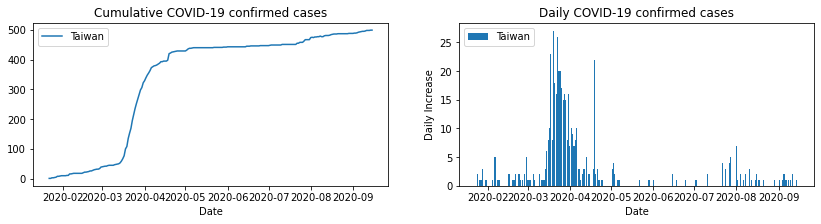

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 3))
x = tw['Date'].values
y = tw['Confirmed'].values
axes[0].plot(x, y, label="Taiwan")
axes[0].set_xlabel('Date')
axes[0].set_title('Cumulative COVID-19 confirmed cases')
axes[0].legend(loc='upper left')
axes[1].bar(x[1:], daily_increase, label='Taiwan') # 因為是每日新增，要扣除資料的第一天 2020-01-22
axes[1].set_title('Daily COVID-19 confirmed cases')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Daily Increase')
axes[1].set_ylim(0, None)
axes[1].legend(loc='upper left')
plt.show()

## 自訂類別繪製指定國家的累計確診數趨勢與每日新增確診數

寫一個類別 `Covid19TimeSeries` 把我們前面寫的程式碼包裝起來。

In [12]:
class Covid19TimeSeries:
    def get_ts_wide(self):
        request_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
        time_series = pd.read_csv(request_url)
        return time_series
    def get_ts_long(self):
        ts_wide = self.get_ts_wide()
        id_cols = ts_wide.columns[:4]
        time_series_long = pd.melt(ts_wide, id_vars=id_cols, var_name='Date', value_name='Confirmed')
        date = pd.to_datetime(time_series_long['Date'])
        time_series_long = time_series_long.drop('Date', axis=1)
        time_series_long.insert(4, 'Date', date)
        return time_series_long
    def get_plot_data(self, country):
        ts_long = self.get_ts_long()
        country_df = ts_long[ts_long['Country/Region'] == country]
        group_by_date = country_df.groupby('Date')['Confirmed'].sum()
        date = group_by_date.index
        cumulative_confirmed = group_by_date.values
        daily_increase = np.diff(cumulative_confirmed)
        return date, cumulative_confirmed, daily_increase
    def show_plots(self, country):
        date, cumulative_confirmed, daily_increase = self.get_plot_data(country)
        fig, axes = plt.subplots(1, 2, figsize=(14, 3))
        axes[0].plot(date, cumulative_confirmed, label=country)
        axes[0].set_xlabel('Date')
        axes[0].set_title('Cumulative COVID-19 confirmed cases')
        axes[0].legend(loc='upper left')
        axes[1].bar(date[1:], daily_increase, label=country)
        axes[1].set_title('Daily COVID-19 confirmed cases')
        axes[1].set_xlabel('Date')
        axes[1].set_ylabel('Daily Increase')
        axes[1].set_ylim(0, None)
        axes[1].legend(loc='upper left')
        plt.show()

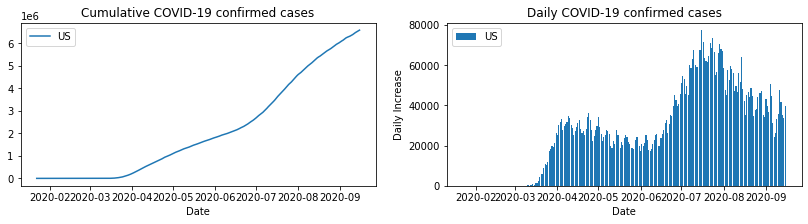

In [13]:
cts = Covid19TimeSeries()
cts.show_plots('US')

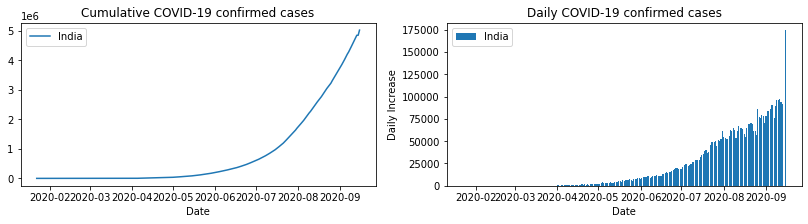

In [14]:
cts = Covid19TimeSeries()
cts.show_plots('India')

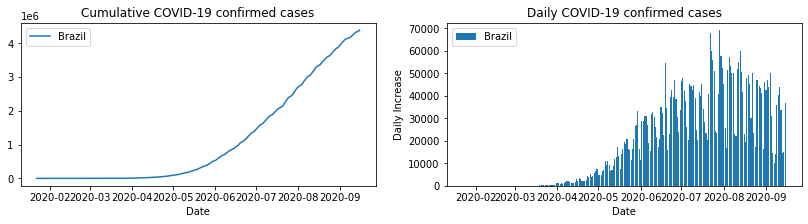

In [15]:
cts = Covid19TimeSeries()
cts.show_plots('Brazil')